In [3]:
pip install tensorflow numpy pandas matplotlib scikit-learn opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

data_dir = r'D:\Perkuliahan\Semester 6\Certan\Proyek\dataset_kotoran_ayam'
categories = ['Healthy', 'Coccidiosis', 'Salmonella','NewCastleDisease']

img_size = 128

def load_data():
    data = []
    labels = []
    for category in categories:
        path = os.path.join(data_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (img_size, img_size))
                data.append(resized_array)
                labels.append(class_num)
            except Exception as e:
                pass
    return np.array(data), np.array(labels)

X, y = load_data()

X = X / 255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


C:\Users\Niko Simanjuntak\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size=32)


Epoch 1/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 27s 161ms/step - accuracy: 0.5558 - loss: 1.0287 - val_accuracy: 0.7931 - val_loss: 0.5827
Epoch 2/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 23s 155ms/step - accuracy: 0.7675 - loss: 0.6597 - val_accuracy: 0.8040 - val_loss: 0.5510
Epoch 3/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 23s 154ms/step - accuracy: 0.8090 - loss: 0.5594 - val_accuracy: 0.8352 - val_loss: 0.4840
Epoch 4/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 24s 158ms/step - accuracy: 0.7970 - loss: 0.5623 - val_accuracy: 0.8511 - val_loss: 0.4078
Epoch 5/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 23s 157ms/step - accuracy: 0.8505 - loss: 0.4248 - val_accuracy: 0.8755 - val_loss: 0.3603
Epoch 6/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 23s 154ms/step - accuracy: 0.8607 - loss: 0.3797 - val_accuracy: 0.8579 - val_loss: 0.3991
Epoch 7/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 24s 164ms/step - accuracy: 0.8873 - loss: 0.3286 - val_accuracy: 0.8730 - val_loss: 0.3791
Epoch 8/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 24s 158ms/step - accuracy: 0.8953 - loss: 0

In [7]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'\nTest accuracy: {test_acc}')


47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8898 - loss: 0.7278

Test accuracy: 0.8889636397361755


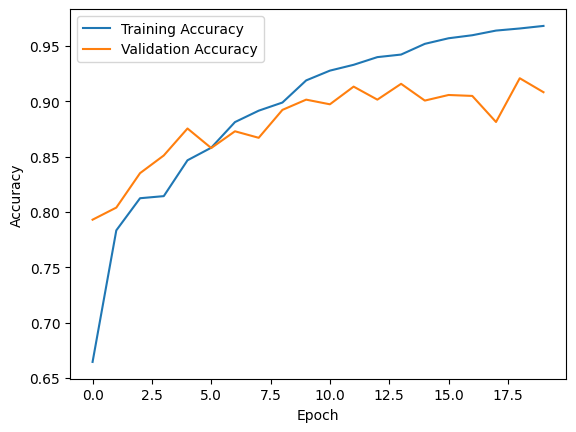

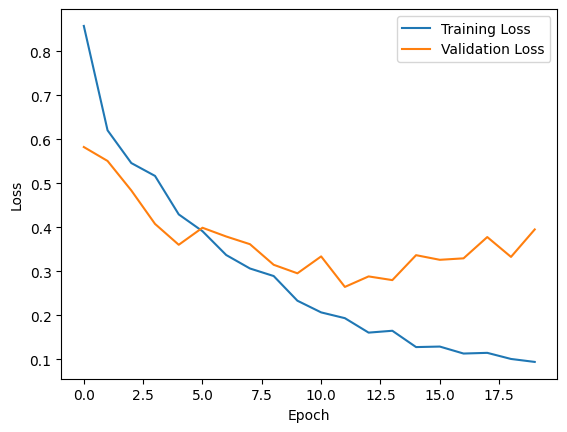

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [9]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = np.argmax(model.predict(X_test), axis=1)

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

cr = classification_report(y_test, y_pred, target_names=categories)
print('Classification Report:\n', cr)


47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step
Confusion Matrix:
 [[457  11   8  14]
 [  9 447   5   2]
 [ 51  10 351   9]
 [ 35   5   6  66]]
Classification Report:
                   precision    recall  f1-score   support

         Healthy       0.83      0.93      0.88       490
     Coccidiosis       0.95      0.97      0.96       463
      Salmonella       0.95      0.83      0.89       421
NewCastleDisease       0.73      0.59      0.65       112

        accuracy                           0.89      1486
       macro avg       0.86      0.83      0.84      1486
    weighted avg       0.89      0.89      0.89      1486



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


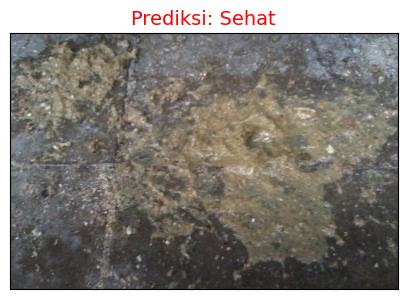

In [10]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

test_image_path = r"C:\Users\Niko Simanjuntak\Pictures\cover-KT-1.jpg"

img_size = 128 
image = cv2.imread(test_image_path)
image = cv2.resize(image, (img_size, img_size))
image = image / 255.0
image = np.expand_dims(image, axis=0)

predictions = model.predict(image)
predicted_label = np.argmax(predictions)

categories = ['Sehat', 'Coccidiosis', 'Salmonella','NewCastleDisease']
predicted_category = categories[predicted_label]

plt.figure(figsize=(5, 5))
plt.imshow(cv2.cvtColor(cv2.imread(test_image_path), cv2.COLOR_BGR2RGB))
plt.xticks([])
plt.yticks([])
plt.title(f"Prediksi: {predicted_category}", fontsize=14, color="red")
plt.show()


In [12]:
model.save("model.keras")


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,915,470 (37.82 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,610,314 (25.22 MB)